# Reto de Kaggle con MLOps

👋 ¡Bienvenido/a al reto de Kaggle con MLOps! En este apasionante desafío, te medirás con tus compañeros para tratar de obtener la mejor posición en un reto de Kaggle, apoyándote en MLflow. ¿El reto? [Predecir el mejor fertilizante para una muestra de suelo dada](https://www.kaggle.com/competitions/playground-series-s5e6/overview), basándote en características como: temperatura, humedad, humedad del suelo, tipo de suelo y tipo de cultivo.

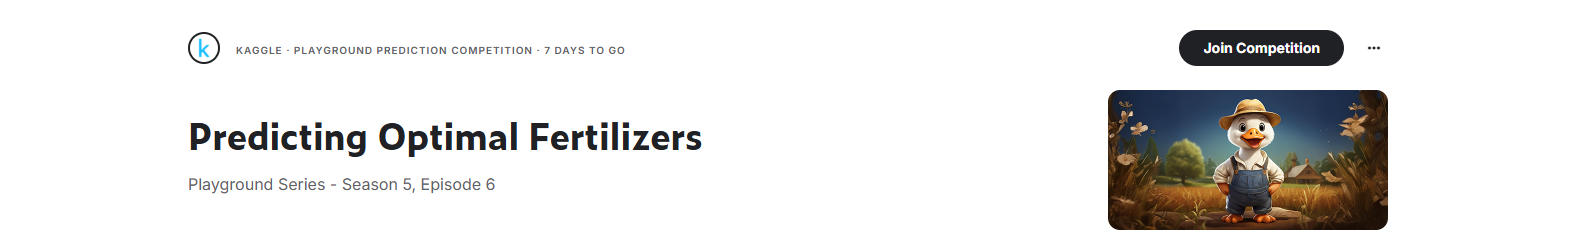

Tu objetivo es determinar los **tres fertilizantes más óptimos por muestra**. La métrica de evaluación es *Mean Average Precision @ 3* (MAP\@3), ideal para clasificaciones con *top‑3* (la explicamos en el *notebook*).

No te preocupes, no estás solo/a 🤗: en este *notebook* puedes encontrar los pasos necesarios (con varios *tips* 💡) que te ayudarán a completar el reto. Recuerda: **el objetivo es que repases los conceptos de *Machine Learning* y *MLOps* que has visto en clase** y los apliques a un reto real de Kaggle. No pasa nada si no lo terminas; lo importante es enfrentarte al reto 😄.

**Pasos a realizar en el reto:**

1. Apuntarse a la competición
2. Descargar el *dataset*
3. Leer el *dataset*
4. Realizar un análisis exploratorio de datos (EDA)
5. Preprocesar los datos
6. Entrenar un modelo de *Machine Learning*
7. Evaluar el modelo
8. Registrar el modelo en MLflow
9. Desplegar el modelo usando Docker
10. Hacer una predicción con el modelo desplegado
11. Subir las predicciones a Kaggle

💪 ¡Adelante y mucha suerte! 🍀

## 1. Apuntarse a la competición

**Objetivo**

Apuntarse a la competición de Kaggle para poder participar y descargar el dataset.

**Pasos a seguir**

1. Ve a la página de la competición en Kaggle: [Playground Series - Season 5, Episode 6](https://www.kaggle.com/competitions/playground-series-s5e6/overview).
2. Haz clic en 'Join Competition' en la página de la competición.
3. Acepta las reglas y condiciones de la competición.

## 2. Descargar el dataset

**Objetivo**

Descargar el dataset de la competición para poder trabajar con él.

**Pasos a seguir**

1. Ve a la pestaña 'Data' en la página de la competición.
2. Haz clic en 'Download All' (abajo a la derecha) para descargar el dataset completo.
3. Descomprime el zip descargado y añade el contenido a tu proyecto.

**Tips**

- 💡 Recuerda ser ordenado/a y crear una carpeta `data` para almacenar los datos. ¿Qué debemos hacer con esta carpeta?
- 💡 Asegúrate de que el dataset contiene los archivos `train.csv`, `test.csv` y `sample_submission.csv`.

## 3. Leer el dataset

**Objetivo**

- Mostrar las 3 primeras filas del train dataset y del test dataset.
- Indicar el tamaño de ambos datasets.
- Mostrar la informacion del dataset de entrenamiento.

**Pasos a seguir**

1. Guarda en variables las rutas de los datasets `train.csv`, `test.csv` y `sample_submission.csv` que has descargado.
2. Utiliza la librería `pandas` para leer los datasets.

**Tips**

- 💡 Recuerda utilizar paths relativos cuando trabajes con archivos, así tu código será reutilizable.
- 💡 Utiliza la librería `pandas` para leer el dataset.

In [1]:
import pandas as pd
DATA_PATH = "../data/fertilizers/"
TRAIN_PATH = DATA_PATH + "train.csv"
TEST_PATH = DATA_PATH + "test.csv"
SUBMISSION_PATH = DATA_PATH + "sample_submission.csv"

df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df_train.head(3)




# Insert your code here 👇

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17


In [2]:
df_test.head(3)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4


In [3]:
df_train.shape

(750000, 10)

In [4]:
len(df_test)

250000

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


## 4. Realizar un análisis exploratorio de datos (EDA)

**Objetivo**

- Mostrar la correlación de las variables numéricas en una gráfica.
- Guardar la gráfica en un archivo `EDA.png`.
- Explicar brevemente lo que se observa en la gráfica.

**Pasos a seguir**

1. Observa los campos presentes en el *dataset*.
2. Obtén la matriz de correlación de las variables del *dataset*.
3. Guarda la gráfica generada en el paso anterior en un archivo `EDA.png`.
4. Explica en una o dos líneas lo que has observado en la gráfica generada.

**Tips**

- 💡 El método `corr` de los *DataFrames* permite obtener la matriz de correlación entre variables numéricas.
- 💡  La matriz de correlación solo acepta variables numéricas. Revisa los parámetros de la función del tip anterior, ya que alguno podría ser útil para excluir datos no numéricos.
- 💡 Recuerda que para generar gráficas utilizamos las librerías `matplotlib` y `seaborn`.
- 💡 Puedes usar la función `plt.savefig` para guardar la gráfica.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_df = df_train.corr(numeric_only=True)
correlation_df




# Insert your code here 👇

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
id,1.000000,-0.001069,-0.000310,0.001752,0.001505,-0.000375,-0.001234
Temparature,-0.001069,1.000000,0.001758,-0.001633,-0.006073,-0.009913,0.000298
Humidity,-0.000310,0.001758,1.000000,0.003424,0.006502,0.005229,0.002413
Moisture,0.001752,-0.001633,0.003424,1.000000,0.003016,-0.001931,-0.006735
Nitrogen,0.001505,-0.006073,0.006502,0.003016,1.000000,0.000543,-0.005464
Potassium,-0.000375,-0.009913,0.005229,-0.001931,0.000543,1.000000,0.000113
Phosphorous,-0.001234,0.000298,0.002413,-0.006735,-0.005464,0.000113,1.000000


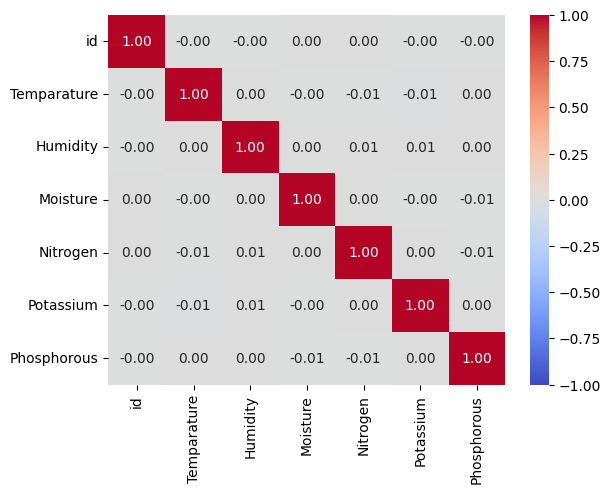

In [7]:

correlation_ax = sns.heatmap(correlation_df, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f")
plt.savefig("EDA.png")


## 5. Preprocesar los datos

**Objetivo**

Aplicar algun tipo de preprocesamiento (sencillo) a los datos. Por ejemplo, eliminar columnas que no aporten nada al modelo o suprimir filas con valores nulos.

**Pasos a seguir**

1. Observa si hay columnas que no aporten nada al modelo, por ejemplo, columnas con un solo valor o columnas que no tengan relacion con la variable objetivo.
2. Elimina las columnas que no aporten nada al modelo.
3. Observa si hay filas con valores nulos y decide si las eliminas o las rellenas con un valor.
4. Guarda el dataset preprocesado en una variable.

**Tips**

- 💡 Puedes usar la función `dropna()` de pandas para eliminar filas con valores nulos o la funcion `drop()` para eliminar columnas enteras.
- 💡 Por simplicidad te recomiendo que, en esta fase, elimines las variables independientes categoricas.
- 💡 BONUS: recuerda que el mismo preprocesamiento que realices en los datos de entrenamiento deberas hacerlo en los datos de test para poder enviar los resultados a Kaggle. El 'truco' aqui esta en crear una funcion en python que tenga como entrada el dataframe original y nos de como salida un dataframe procesado. Te dejo el esqueleto de la funcion para que sea mas sencillo 'rellenarla' con la logica de preprocesamiento. He incluido type hinting en los parametros de la funcion para mejorar la legibilidad y he aniadido docstrings para que la funcion este documentada (buenas practicas).

In [8]:
def preprocess_df(df: pd.DataFrame) -> pd.DataFrame:
    """Preprocess the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame to preprocess.
    
    Returns:
        pd.DataFrame: The preprocessed DataFrame.
    """
    df_preprocessed = df.copy()  # Create a copy to avoid modifying the original DataFrame
    df_preprocessed.drop(columns=['id', 'Soil Type', 'Crop Type'], inplace=True)
    return df_preprocessed

preprocessed_train_df = preprocess_df(df_train)
preprocessed_train_df

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,70,36,36,4,5,28-28
1,27,69,65,30,6,18,28-28
2,29,63,32,24,12,16,17-17-17
3,35,62,54,39,12,4,10-26-26
4,35,58,43,37,2,16,DAP
...,...,...,...,...,...,...,...
749995,25,69,30,8,16,6,28-28
749996,37,64,58,38,8,20,17-17-17
749997,35,68,59,6,11,29,10-26-26
749998,31,68,29,9,11,12,20-20


In [9]:
import mlflow

In [10]:
import sys
print(sys.executable)

/opt/conda/envs/26junio/bin/python


## 6. Entrenar un modelo de *Machine Learning*

**Objetivo**

Entrenar un modelo de *Machine Learning* con el *dataset* preprocesado e indicar brevemente por qué has elegido ese modelo.

**Pasos a seguir**

1. Divide el *dataset* en dos partes: una con las variables de entrada (X) y otra con la variable objetivo (Y).
2. Divide X e Y en dos partes: una para entrenar el modelo y otra para evaluar su rendimiento.
3. Selecciona un modelo de *Machine Learning* adecuado para el problema.
4. Entrena el modelo con el *split* de entrenamiento.

**Tips**

* 💡 Puedes usar la función `train_test_split()` de `sklearn.model_selection` para dividir los datos.
* 💡 Recuerda establecer la semilla para fijar la aleatoriedad de la división de los datos.
* 💡 En este caso, cuando hagamos el *split*, hablaremos de “conjunto de validación” para no confundirlo con el conjunto de *test* que nos da Kaggle para hacer predicciones y obtener una puntuación.
* 💡 El *output* de hacer un *split* entre *test* y *train* se compone de cuatro elementos: X de entrenamiento, Y de entrenamiento, X de validación e Y de validación.

In [18]:
from sklearn.model_selection import train_test_split

# Insert your code here 👇
X = preprocessed_train_df.drop(columns=['Fertilizer Name'])
y = preprocessed_train_df['Fertilizer Name']



In [19]:
TEST_SIZE = 0.2
SEED = 42

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)


In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 7. Evaluar el modelo

**Objetivo**

Imprimir por pantalla las metricas propias del modelo entrenado.

**Pasos a seguir**

1. Utiliza el *split* de validación para generar predicciones con el modelo entrenado.
2. Calcula la métrica MAP\@3 entre las predicciones y los valores reales del *split* de validación.
3. Imprime el valor de la métrica MAP\@3.

**Tips**

* 💡 Las metricas se pueden calcular haciendo uso del modulo `sklearn.metrics`.

In [22]:
from sklearn import metrics

y_pred = model.predict(X_val)
y_val

accuracy = metrics.accuracy_score(y_val, y_pred)
precision = metrics.precision_score(y_val, y_pred, average='weighted')
recall = metrics.recall_score(y_val, y_pred, average='weighted')

accuracy, precision, recall

(0.14927333333333334, 0.1493642488055372, 0.14927333333333334)

## 8. Registrar el modelo en MLFlow

**Objetivo**

Alojar, al menos, el modelo, las metricas y la grafica EDA en el servicio de MLFlow.

**Pasos a seguir**  

1. Lanzar un servidor de MLFlow en tu máquina local.
2. Conectar este notebook al servidor de MLFlow.
3. Crear un experimento en MLFlow para registrar los resultados del reto.
4. Registrar el modelo entrenado en MLFlow.
5. Registrar las metricas en MLFlow.
6. Registrar la grafica EDA en MLFlow.

**Tips**

- 💡 Para lanzar MLFlow debes abrir una terminal, activar tu entorno de conda y ejecutar el comando `mlflow server`.
- 💡 Tienes mas informacion sobre como registrar modelos, metricas y artefactos en la [documentacion del curso](https://matesanz.github.io/mlops-cookbook/mlflow/).

In [23]:
import mlflow

MLFLOW_URI = 'http://localhost:5000/'
EXPERIMENT_NAME = "Fertilizer Classification"

mlflow.set_tracking_uri(MLFLOW_URI)

mlflow.set_experiment(EXPERIMENT_NAME)


# Insert your code here 👇

2025/06/26 18:43:32 INFO mlflow.tracking.fluent: Experiment with name 'Fertilizer Classification' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/586437596323439837', creation_time=1750963412963, experiment_id='586437596323439837', last_update_time=1750963412963, lifecycle_stage='active', name='Fertilizer Classification', tags={}>

In [24]:
with mlflow.start_run():
    mlflow.log_metrics({
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    })


🏃 View run blushing-lamb-842 at: http://localhost:5000/#/experiments/586437596323439837/runs/7c994f2db48c45cfab40e5f8d333d6f0
🧪 View experiment at: http://localhost:5000/#/experiments/586437596323439837


In [25]:
import mlflow.sklearn


mlflow.log_artifact("EDA.png", "corr_fig.png")
mlflow.sklearn.log_model(model, 'model')

2025/06/26 18:49:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/26 18:49:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## 9. Desplegar el modelo usando docker

**Objetivo**

Lanzar un contenedor de Docker que sirva el modelo entrenado y permita hacer predicciones.

**Pasos a seguir**

1. Ve al servidor de MLFlow donde tienes el modelo registrado ([https://localhost:5000](https://localhost:5000) si lo has lanzado en tu máquina local).
2. Toma el Run de MLFlow donde tienes el modelo registrado.
3. Registra el modelo en MLFlow dentro de una nueva 'familia' de modelos.
4. Abre una nueva terminal y conecta con el servidor de MLFlow.
5. Usa el comando `mlflow models build-docker` para construir una imagen que contenga el modelo registrado.
6. Despliega el modelo en Docker. ¿Cuál era el comando de docker que permite lanzar un contenedor a partir de una imagen?

**Tips**

* 💡 Para comunicar la terminal con el servidor de MLFLOW usamos una variable de entorno, ¿cuál era?
* 💡 El comando completo mencionado en el paso 5 lo tienes en las diapositivas del apartado de docker en el campus. 😄
* 💡 Puedes usar el comando `docker image list` para ver las imágenes que tienes en tu ordenador.
* 💡 Recuerda que este paso puede llevar unos pocos minutos, aprovecha para repasar el notebook.
* 💡 Cuando vayas a lanzar el contenedor incluye el parámetro `--network host` para que tanto el contenedor como tu ordenador se encuentren en la misma red y así puedas comunicarte con el modelo.

## 10. Hacer una predicción con el modelo desplegado

**Objetivo**

Obtener las predicciones de la competición usando el modelo desplegado en Docker.

**Pasos a seguir**

1. Preprocesa los datos de `test.csv` de la misma forma que has preprocesado los datos de `train.csv` (si has creado la función de preprocesamiento mencionada en la sección 5, puedes usarla aquí 😄).
2. Crea el JSON (diccionario en Python) de entrada que el modelo desplegado espera. Este JSON debe contener los datos de `test.csv` preprocesados.
3. Haz una petición HTTP POST al servidor de Docker que sirve el modelo desplegado. (El JSON de entrada debe ser enviado en el cuerpo de la petición).
4. Imprime las predicciones obtenidas del modelo desplegado.

**Tips**

* 💡 Puedes usar la librería `requests` de Python para hacer peticiones HTTP.
* 💡 Empieza fácil: haz una simple llamada al endpoint `/ping` del modelo desplegado para comprobar que todo funciona correctamente.
* 💡 Tienes la documentación específica de este paso [aquí](https://matesanz.github.io/mlops-cookbook/mlflow/invocation/calling_a_model_api/).
* 💡 Recuerda que la API del modelo desplegado espera un JSON con una estructura específica: [Aqui tienes la documentacion](https://mlflow.org/docs/latest/ml/deployment/deploy-model-locally/#wrapped-payload-dict)
* 💡 El endpoint para comunicarse con el modelo es `/invocations`

In [7]:
import requests

URL = ""  # ‼️Change this to the actual URL of your deployed model
body = {}  # ‼️Change this to the actual body structure expected by your model
headers={"Content-Type": "application/json"}

# Insert your code here 👇

## 11. Subir las predicciones a Kaggle

**Objetivo**

Mostrar un pantallazo del score obtenido en Kaggle tras subir las predicciones.

**Pasos a seguir**
1. Crea un dataframe de pandas con las predicciones obtenidas del modelo desplegado. Asegurate de que el dataframe tiene dos columnas: `id` y `Fertilizer Name`, tal y como se indica en el archivo `sample_submission.csv` de la competicion.
2. Guarda el dataframe en un archivo `submission.csv` con las predicciones obtenidas del modelo desplegado.
3. Ve a la pestaña 'Submit Predictions' en la página de la competición y sube el archivo `submission.csv`.
4. Haz una captura de pantalla del score obtenido en Kaggle tras subir las predicciones y añádela al notebook.

**Tips**

- 💡 Este apartado puede ser algo mas tecnico, no dudes en preguntarme/ recurrir a chatGPT (o similar).
- 💡 Puedes usar la función `to_csv()` de pandas para guardar el dataframe como CSV.
- 💡 Recuerda que el archivo `submission.csv` debe tener el mismo formato que el archivo `sample_submission.csv` de la competicion.
- 💡 Puedes usar la función `read_csv()` de pandas para leer el archivo `sample_submission.csv` y obtener el formato correcto para el archivo `submission.csv`.
- 💡 Puedes aniadir un pantallazo haciendo copy-paste de la imagen dentro del notebook.

In [8]:
ids = []  # ‼️Change this to the actual IDs from your test set
predictions = []  # ‼️Change this to the actual predictions from your model

submission_df = pd.DataFrame({
    'id': ids,
    'Fertilizer Name': predictions
})
submission_df.to_csv("submission.csv", index=False)

# 🎉 ¡Enhorabuena por llegar hasta aquí!

Lo primero que quiero hacer es felicitarte por haber llegado hasta el final del reto. Espero que hayas aprendido mucho y que hayas disfrutado del proceso. Ahora, quizá estás pensando: ¿cómo puedo mejorar mi puntuación? Pues bien, te dejo una lista de ideas que puedes implementar para mejorar tu modelo y tu puntuación en Kaggle:

* Hemos enviado solo la mejor predicción del modelo por simplicidad, pero puedes enviar las 3 mejores predicciones del modelo para cada muestra. Te recomiendo que, si sigues por este camino, NO intentes obtener las predicciones usando la API con el modelo desplegado, ya que dicho modelo solo responde con UNA predicción. En su lugar, puedes hacer las predicciones directamente en el notebook y luego enviarlas a Kaggle. Para ello, puedes usar la función `predict_proba()` de tu modelo de Machine Learning. Te dejo la función que puedes usar para obtener las 3 mejores predicciones de tu modelo:

In [ ]:
from sklearn.base import BaseEstimator


def get_top_3_predictions(model: BaseEstimator, X: pd.DataFrame) -> pd.DataFrame:
    """Get the top 3 predictions for each row in the DataFrame.
    
    Args:
        model (BaseEstimator): The trained model.
        X (pd.DataFrame): The input features.
    
    Returns:
        pd.DataFrame: DataFrame with top 3 predictions.
    """
    probas = model.predict_proba(X)
    top_3_indices = probas.argsort(axis=1)[:, -3:][:, ::-1]
    top_3_predictions = [model.classes_[indices] for indices in top_3_indices]
    return pd.DataFrame(top_3_predictions, columns=['Top 1', 'Top 2', 'Top 3'])

* También, por simplificar, hemos eliminado las columnas con valores categóricos no numéricos. Puedes intentar codificar estas columnas usando técnicas como One-Hot Encoding o Label Encoding. Recuerda que si decides codificar las columnas categóricas, debes hacerlo tanto en el dataset de entrenamiento como en el de test.
* Puedes probar diferentes modelos de Machine Learning y comparar sus resultados. Por ejemplo, puedes probar con Random Forest, Gradient Boosting, XGBoost, etc. Recuerda que cada modelo tiene sus propias ventajas y desventajas, por lo que es importante que pruebes varios y elijas el que mejor se adapte a tus datos.
* No hay nada como aprender haciendo, por ello te recomiendo que vayas a la sección de `Code` de Kaggle y veas los notebooks de otros participantes. Seguro que encuentras ideas interesantes que puedes aplicar a tu modelo.
* Aprovecha: si estás orgulloso/a de tu modelo y quieres compartirlo con el mundo, puedes publicarlo en la sección de `Code` de Kaggle. Así, otros participantes podrán ver tu trabajo y aprender de él. 🤗 ¡Compartir es vivir!